<h1>
    <center>Novel Corona Virus 2020 - Exploratory Data Analysis(EDA)</center>
</h1>
<br/>
<center><h3>PROJECT DONE BY</h3></center>
<center><h5>Sunil Kumar Mano</h5></center>
<center><h5>AI and Machine Learning practitioner</h5></center>
<center><h5>Email: sunilkumarm.182@gmail.com</h5></center>

## 1. Introduction

The 2019-nCoV is a contagious coronavirus that hailed from Wuhan (Hubei province), China. This new strain of virus has striked fear in many countries as cities are quarantined and hospitals are overcrowded.

"Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases. Some coronaviruses transmit between animals, some between animals and people, and others from people to people." (https://www.canada.ca/en/public-health/services/diseases/coronavirus.html)


#### Purpose of this notebook:

The purpose of this notebook is to provide insights into the data scrapped from a dashboard created by Johns Hopkins University.

__Note__: The virus and information available are relatively new, which means the information available now might change in the future.

## 2. Import the packages

#### 2.1 Import the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We have imported the necessary packages in our project that are helpful for our data analysis.

#### 2.2 Import the dataset

Next, let's import the data in our project.

In [17]:
corona_data = pd.read_csv("https://raw.githubusercontent.com/sunilkumarmano/Exploratory-Data-Analysis/master/Novel%20Corona%20Virus%202020%20-%20Exploratory%20Data%20Analysis/2019_nCoV_data.csv")
corona_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


We have imported the data in our project for analysis. Let's start the analysis by digging deep into each and every columns.

## 3. Data Understanding

#### 3.1 Checking the columns in the dataset

Let's start by analysing the number of columns, description and it's purpose in the dataset

In [18]:
corona_data.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

From the analysis above, our dataset has 8 columns. The description and the purpose of each and every columns is given below.

__Column Description:__

1. __Sno__ - Serial number
2. __Date__ - Date and time of the observation in MM/DD/YYYY HH:MM:SS
3. __Province/State__ - Province or state of the observation
4. __Country__ - Country of observation
5. __Last Update__ - Time in UTC at which the data is updated for the given province or country.
6. __Confirmed__ - Number of confirmed cases
7. __Deaths__ - Number of deaths
8. __Recovered__ - Number of recovered cases

#### 3.2 Checking the Null Values in the dataset

Let's check whether our data have any Null values in it. Null values may impact our analysis results, if present.

In [19]:
corona_data.isnull().sum()

Sno                 0
Date                0
Province/State    311
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

From the analysis above, our dataset has 290 null/empty values in the __Province/State__ column.

But logically, when checking the entire data we can understand that __Province/State__ column is not captured for Non-China countries.

#### 3.3 Checking the Shape of the dataset

Let's check the shape of the dataset i.e., the number of observations/rows and features/columns present in the dataset.

In [20]:
corona_data.shape

(1199, 8)

Our dataset has 1127 observations/rows and 8 features/columns present.

#### 3.4 Checking the datatype present in the dataset

Let's check the datatype of the features present in the dataset.

In [21]:
corona_data.dtypes

Sno                 int64
Date               object
Province/State     object
Country            object
Last Update        object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

Our dataset has __1 - Integer__ feature, __4 - Categorial__ features and __3 - float__ value columns.

#### 3.5 Concise summary of the dataset

Let's check the consise summary of the dataset.

In [22]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
Sno               1199 non-null int64
Date              1199 non-null object
Province/State    888 non-null object
Country           1199 non-null object
Last Update       1199 non-null object
Confirmed         1199 non-null float64
Deaths            1199 non-null float64
Recovered         1199 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 75.1+ KB


#### 3.6 Statistical summary of the dataset

Let's check the statistical summary of the dataset.

In [23]:
corona_data.describe(include = "all")

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,1199.000000,1199,888,1199,1199,1199.000000,1199.000000,1199.000000
unique,NaN,20,59,33,315,NaN,NaN,NaN
top,NaN,02/10/2020 19:30:00,Macau,Mainland China,01/31/2020 19:00:00,NaN,NaN,NaN
freq,NaN,72,20,584,63,NaN,NaN,NaN
mean,600.000000,NaN,NaN,NaN,NaN,276.213511,5.961635,14.617181
std,346.265794,NaN,NaN,NaN,NaN,1966.264622,58.082724,103.959136
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,300.500000,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000
50%,600.000000,NaN,NaN,NaN,NaN,10.000000,0.000000,0.000000
75%,899.500000,NaN,NaN,NaN,NaN,82.000000,0.000000,2.000000


## 4. Exploratory Data Analysis

#### 4.1 Total Number of Corona cases World wide

Let's analyse the total number of Corona cases confirmed, deaths and recovered around the world.

In [24]:
print("Total number of confirmed cases Worldwide : ", corona_data.Confirmed.sum())
print("Total number of Death cases Worldwide : ", corona_data.Deaths.sum())
print("Total number of Recovered cases Worldwide : ", corona_data.Recovered.sum())

Total number of confirmed cases Worldwide :  331180.0
Total number of Death cases Worldwide :  7148.0
Total number of Recovered cases Worldwide :  17526.0


#### 4.2 Number of Corona cases Confirmed - Countrywise

Let's group the Corona cases __confirmed__ based on every country.

In [25]:
corona_confirmed = corona_data.groupby("Country").Confirmed.sum().reset_index()
corona_confirmed_cases = corona_confirmed.sort_values("Confirmed", ascending = False)
corona_confirmed_cases

,Country,Confirmed
15,Mainland China,327215.0
5,China,549.0
22,Singapore,351.0
28,Thailand,347.0
19,Others,321.0
13,Japan,312.0
9,Hong Kong,300.0
23,South Korea,245.0
27,Taiwan,188.0
0,Australia,179.0


#### 4.3 Visualizing the Corona cases Confirmed - Countrywise

Let's visualize the top 10 countries which has confirmed the most number of Corona cases.

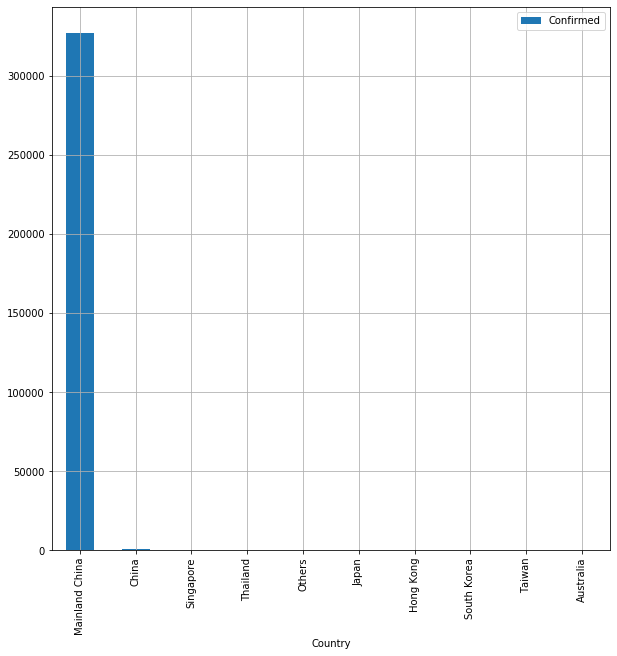

In [26]:
top_10_corona_confirmed_cases = corona_confirmed_cases.head(10)
top_10_corona_confirmed_cases.plot("Country", ["Confirmed"], kind = "bar", grid = True, figsize = (10,10))

#### 4.4 Number of Corona Death cases - Countrywise

Let's group the Corona __Death__ cases based on every country.

In [27]:
corona_death = corona_data.groupby("Country").Deaths.sum().reset_index()
corona_death_cases = corona_death.sort_values("Deaths", ascending = False)
corona_death_cases

,Country,Deaths
15,Mainland China,7131.0
20,Philippines,10.0
9,Hong Kong,7.0
0,Australia,0.0
21,Russia,0.0
22,Singapore,0.0
23,South Korea,0.0
24,Spain,0.0
25,Sri Lanka,0.0
18,Nepal,0.0


#### 4.5 Visualizing the Corona Death cases - Countrywise

Let's visualize the top 10 countries which has most number of Corona death cases.

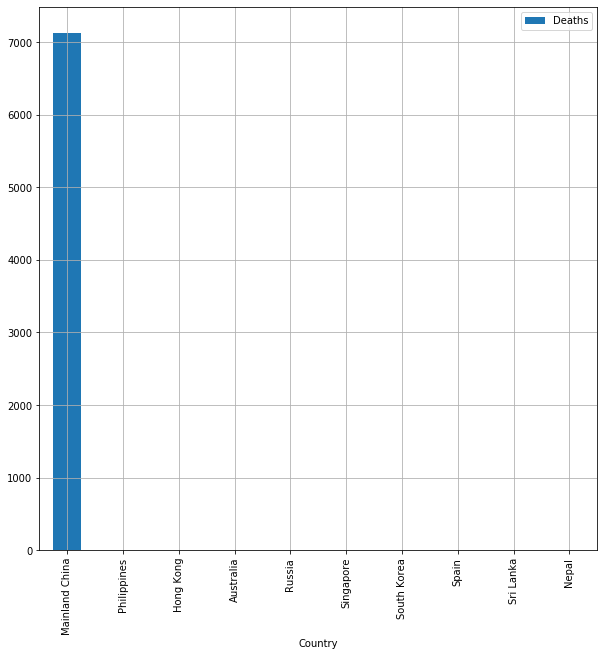

In [28]:
top_10_corona_death_cases = corona_death_cases.head(10)
top_10_corona_death_cases.plot("Country", ["Deaths"], kind = "bar", grid = True, figsize = (10,10))

#### 4.6 Number of Corona Recovered cases - Countrywise

Let's group the Corona __Recovered__ cases based on every country.

In [29]:
corona_recovered = corona_data.groupby("Country").Recovered.sum().reset_index()
corona_recovered_cases = corona_recovered.sort_values("Recovered", ascending = False)
corona_recovered_cases

,Country,Recovered
15,Mainland China,17343.0
28,Thailand,91.0
0,Australia,24.0
13,Japan,19.0
23,South Korea,10.0
32,Vietnam,10.0
30,US,6.0
22,Singapore,6.0
27,Taiwan,5.0
14,Macau,5.0


#### 4.7 Visualizing the Corona Recovered cases - Countrywise

Let's visualize the top 10 countries which has most number of Corona Recovered cases.

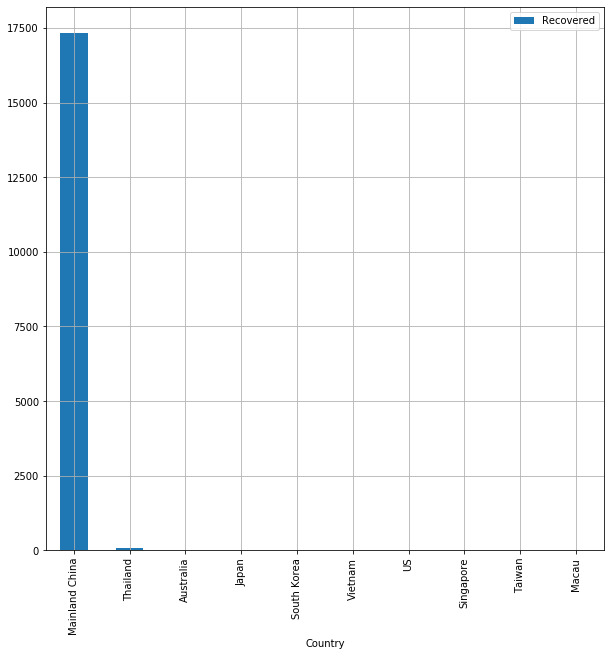

In [30]:
top_10_corona_recovered_cases = corona_recovered_cases.head(10)
top_10_corona_recovered_cases.plot("Country", ["Recovered"], kind = "bar", grid = True, figsize = (10,10))

#### 4.8 Filtering out the data of China and it's provinces

Let's filter the data of China and it's provinces as the city are not captured for Non-China countries.

In [39]:
corona_china_data = corona_data[(corona_data.Country == "Mainland China") | (corona_data.Country == "China") | (corona_data.Country == "Hong Kong")]
corona_china_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


#### 4.9 Checking for the null values in China data

Let's check for the null values in the Filtered China data.

In [41]:
corona_china_data.isnull().sum()

Sno               0
Date              0
Province/State    0
Country           0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

From the above, we can understand that the filter China data does not have any empty values.

#### 4.10 Number of Corona cases Confirmed in China Province - Statewise

Let's group the Corona cases __confirmed__ in China Province based on the Statewise

In [43]:
corona_china_confirmed = corona_china_data.groupby("Province/State").Confirmed.sum().reset_index()
corona_china_confirmed_cases = corona_china_confirmed.sort_values("Confirmed", ascending = False)
corona_china_confirmed_cases

,Province/State,Confirmed
13,Hubei,227537.0
33,Zhejiang,11506.0
5,Guangdong,11170.0
11,Henan,9792.0
14,Hunan,8446.0
0,Anhui,7070.0
17,Jiangxi,6773.0
2,Chongqing,4971.0
16,Jiangsu,4457.0
24,Shandong,4279.0


#### 4.11 Visualizing the Corona Confirmed cases in China- Statewise

Let's visualize the top 10 state/provience which has most number of Corona Confirmed cases.

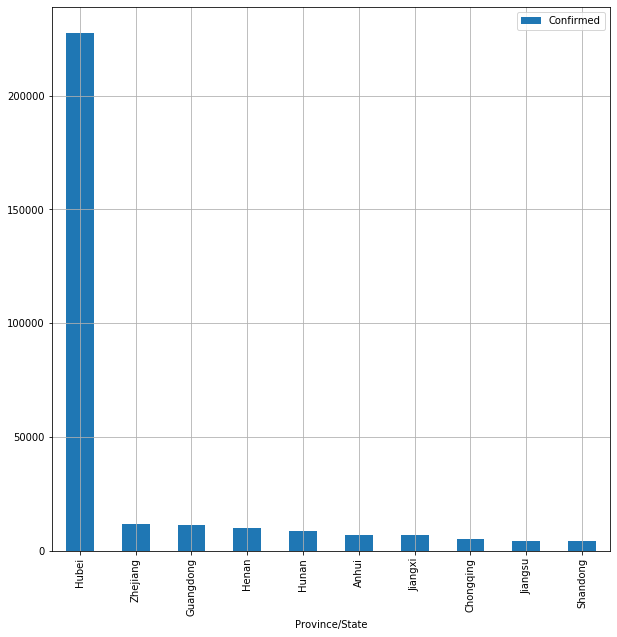

In [45]:
top_10_corona_china_confirmed_cases = corona_china_confirmed_cases.head(10)
top_10_corona_china_confirmed_cases.plot("Province/State", ["Confirmed"], kind = "bar", grid = True, figsize = (10,10))

#### 4.12 Number of Corona Death cases in China Province - Statewise

Let's group the Corona __Death__ cases in China Province based on the Statewise

In [46]:
corona_china_deaths = corona_china_data.groupby("Province/State").Deaths.sum().reset_index()
corona_china_death_cases = corona_china_deaths.sort_values("Deaths", ascending = False)
corona_china_death_cases

,Province/State,Deaths
13,Hubei,6886.0
10,Heilongjiang,45.0
11,Henan,44.0
9,Hebei,22.0
8,Hainan,21.0
2,Chongqing,20.0
1,Beijing,18.0
25,Shanghai,17.0
27,Sichuan,13.0
12,Hong Kong,7.0


#### 4.13 Visualizing the Corona Death cases in China - Statewise

Let's visualize the top 10 __state/provience__ in China which has most number of Corona death cases.

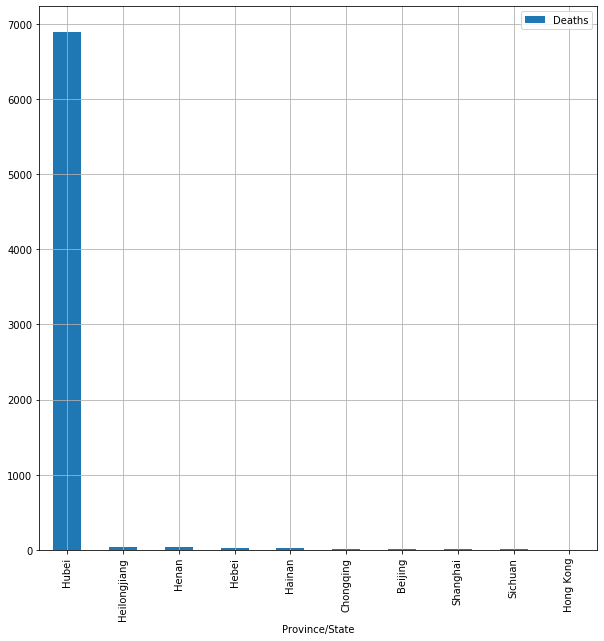

In [47]:
top_10_corona_china_death_cases = corona_china_death_cases.head(10)
top_10_corona_china_death_cases.plot("Province/State", ["Deaths"], kind = "bar", grid = True, figsize = (10,10))

#### 4.14 Number of Corona Recovered cases in China Province - Statewise

Let's group the Corona __Recovered__ cases in China Province based on the Statewise.

In [48]:
corona_china_recovered = corona_china_data.groupby("Province/State").Recovered.sum().reset_index()
corona_china_recovered_cases = corona_china_recovered.sort_values("Recovered", ascending = False)
corona_china_recovered_cases

,Province/State,Recovered
13,Hubei,9754.0
33,Zhejiang,1127.0
14,Hunan,886.0
5,Guangdong,771.0
11,Henan,768.0
17,Jiangxi,485.0
0,Anhui,378.0
27,Sichuan,368.0
16,Jiangsu,357.0
24,Shandong,294.0


#### 4.15 Visualizing the Corona Recovered cases in China - Statewise

Let's visualize the top 10 state/provience in China which has most number of Corona Recovered cases.

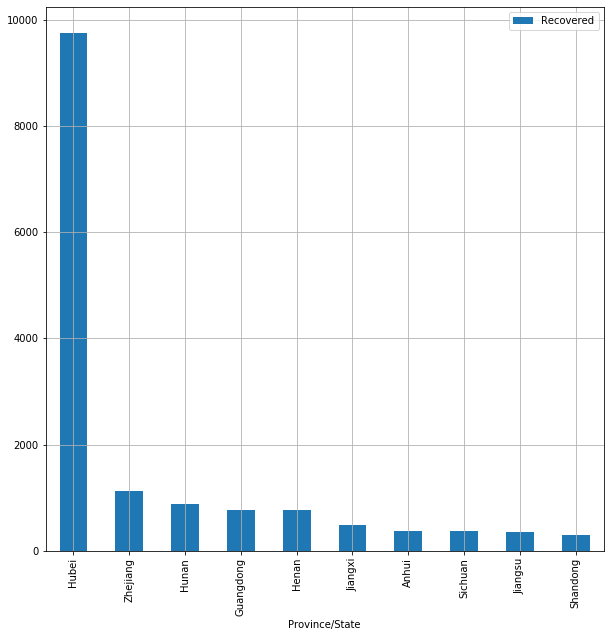

In [50]:
top_10_corona_china_recovered_cases = corona_china_recovered_cases.head(10)
top_10_corona_china_recovered_cases.plot("Province/State", ["Recovered"], kind = "bar", grid = True, figsize = (10,10))

#### 4.16 Visualizing the Corona Confirmed cases - Datewise

Let's visualize the growth of Corona confirmed cases based on each dates in a line plot.